# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.GenParticleProcessor import GenParticleProcessor
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
tstart = time.time()

files = {'JpsiLambdacPlus': ['/afs/cern.ch/work/m/mabarros/public/MonteCarlo/CMSSW_10_6_12/src/Analyzer_files/JpsiLambdacplus_13TeV_GenParticle.root']}

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=GenParticleProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=100,
                                 # maxchunks=10,
                                 )

elapsed = time.time() - tstart
print(output)


{'Muon_lead_pt': <Hist (dataset,pt) instance at 0x7f6118ae1c18>, 'Muon_trail_pt': <Hist (dataset,pt) instance at 0x7f60f4cdefd0>, 'Muon_eta': <Hist (dataset,eta) instance at 0x7f60f4cd8e80>, 'Muon_phi': <Hist (dataset,phi) instance at 0x7f60f4cd8d68>, 'Dimuon_mass': <Hist (dataset,mass) instance at 0x7f60f4cd8da0>, 'Dimuon_pt': <Hist (dataset,pt) instance at 0x7f60f4cd80b8>, 'Dimuon_eta': <Hist (dataset,eta) instance at 0x7f60f4cd8ef0>, 'Dimuon_phi': <Hist (dataset,phi) instance at 0x7f60f4cd8f28>, 'D0_mass': <Hist (dataset,mass) instance at 0x7f60f4cd8f98>, 'D0_pt': <Hist (dataset,pt) instance at 0x7f6136209898>, 'D0_eta': <Hist (dataset,eta) instance at 0x7f61362098d0>, 'D0_phi': <Hist (dataset,phi) instance at 0x7f6136209908>, 'D0_rec_mass': <Hist (dataset,mass) instance at 0x7f6136209940>, 'D0_rec_pt': <Hist (dataset,pt) instance at 0x7f6136209978>, 'D0_rec_eta': <Hist (dataset,eta) instance at 0x7f61362099b0>, 'D0_rec_phi': <Hist (dataset,phi) instance at 0x7f61362099e8>, 'Dplus_

(1.76, 2.0)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


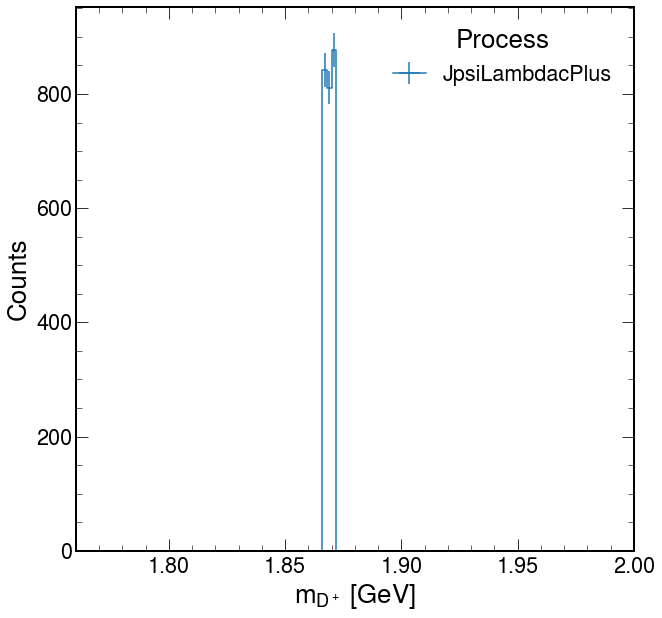

In [3]:
ax = hist.plot1d(output['Dplus_rec_mass'], overlay='dataset')
ax.set_xlim(1.76, 2.0)

(0.0, 20.0)

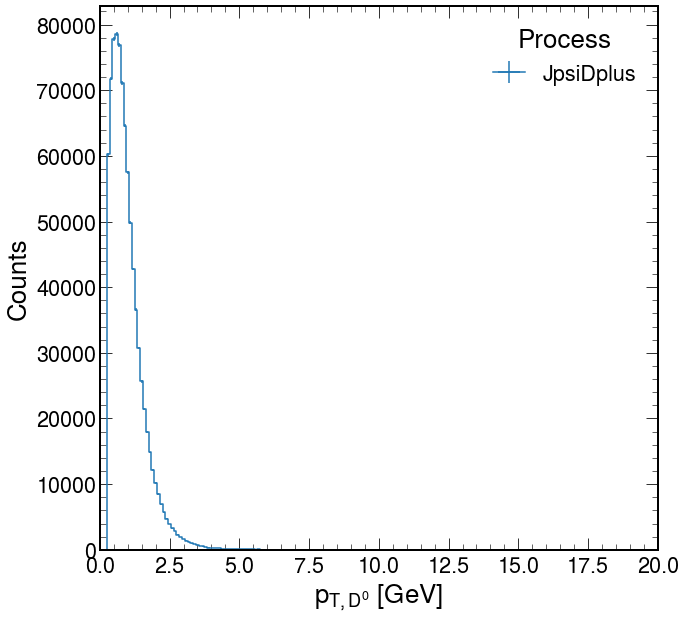

In [10]:
ax = hist.plot1d(output['Dplus_rec_pt'], overlay='dataset')
ax.set_xlim(0, 20)


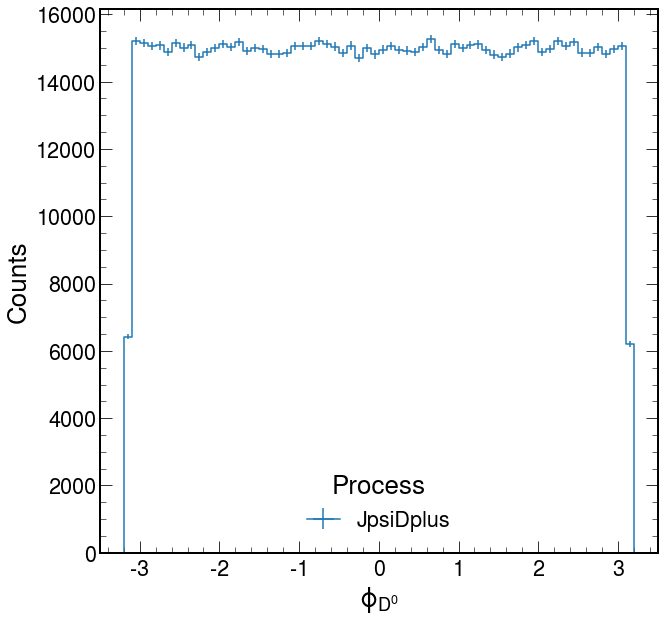

In [11]:
ax = hist.plot1d(output['Dplus_rec_phi'], overlay='dataset')

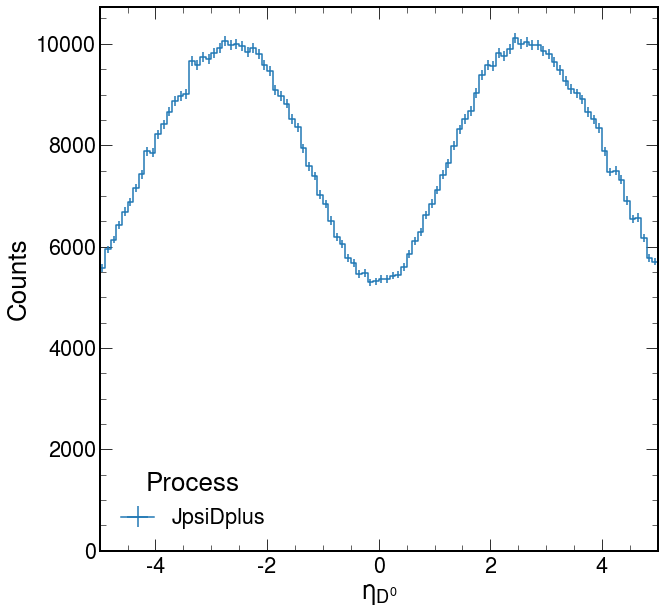

In [12]:
ax = hist.plot1d(output['Dplus_rec_eta'], overlay='dataset')

In [11]:
import awkward
a = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6, 7.7, 8.8, 9.9]])
b = awkward.fromiter([["one", "two"], ["three"], ["four", "five", "six"], ["seven"]])
cc = a.cross(b)
cc

<JaggedArray [[(1.1, one) (1.1, two) (2.2, one) (2.2, two) (3.3, one) (3.3, two)] [] [(4.4, four) (4.4, five) (4.4, six) (5.5, four) (5.5, five) (5.5, six)] [(6.6, seven) (7.7, seven) (8.8, seven) (9.9, seven)]] at 0x7f5f73883f98>

(0.0, 15.0)

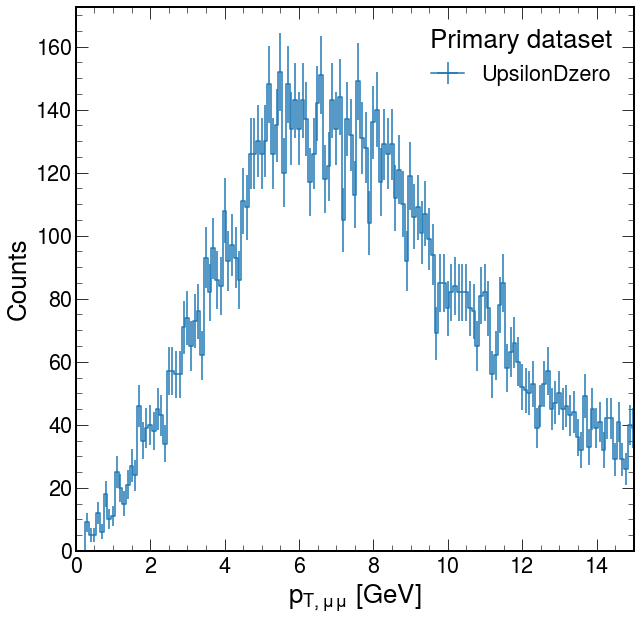

In [11]:
ax = hist.plot1d(output['Dimuon_pt'], overlay='dataset')
ax.set_xlim(0,15)

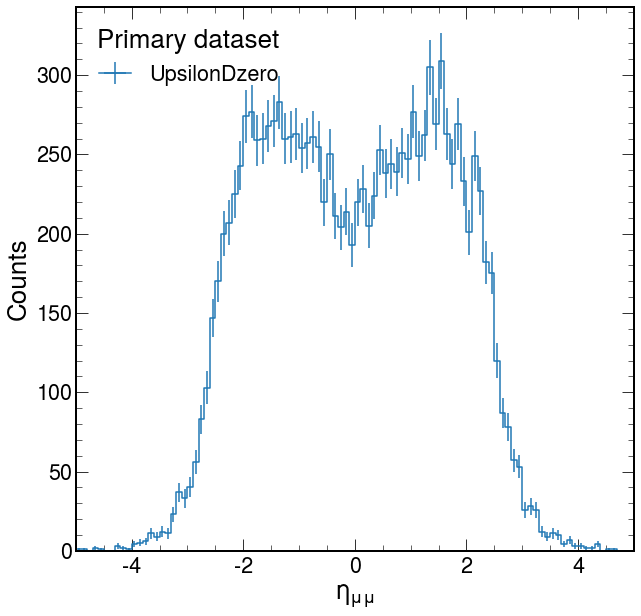

In [12]:
ax= hist.plot1d(output['Dimuon_eta'], overlay='dataset')

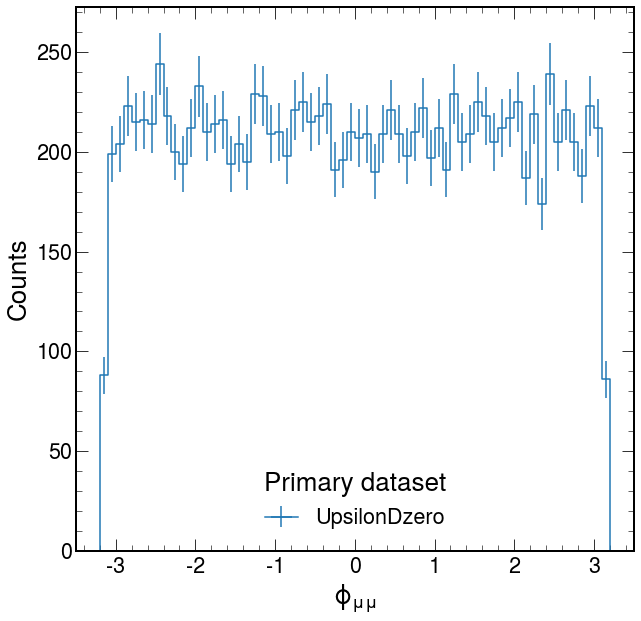

In [13]:
ax= hist.plot1d(output['Dimuon_phi'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

In [ ]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,7.5)

In [ ]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')

In [8]:
import uproot

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

branches = ['nGenPart', 'GenPart_pt', 'GenPart_eta', 'GenPart_phi', 'GenPart_mass', 'GenPart_charge', 'GenPart_pdgId', 'GenPart_mpdgId', 'GenPart_vx', 'GenPart_vy', 'GenPart_vz',]
file = ['/afs/cern.ch/work/m/mabarros/public/MonteCarlo/CMSSW_10_6_12/src/show.root']

for chunk in uproot.iterate(file, 'Events', branches=branches, entrysteps=500000, namedecode='ascii'):
    GenParticle = JaggedCandidateArray.candidatesfromcounts(chunk['nGenPart'],
                                            pt=chunk['GenPart_pt'].content,
                                            eta=chunk['GenPart_eta'].content,
                                            phi=chunk['GenPart_phi'].content,
                                            mass=chunk['GenPart_mass'].content,
                                            charge=chunk['GenPart_charge'].content,
                                            pdgId=chunk['GenPart_pdgId'].content,
                                            mpdgId=chunk['GenPart_mpdgId'].content,
                                            vx=chunk['GenPart_vx'].content,
                                            vy=chunk['GenPart_vy'].content,
                                            vz=chunk['GenPart_vz'].content,
                                           )

kaonid = (np.absolute(GenParticle.pdgId) == 321)
Kaon = GenParticle[kaonid]

pionid = (np.absolute(GenParticle.pdgId) == 211)
Pion = GenParticle[pionid]

protonid = (np.absolute(GenParticle.pdgId) == 2212)
Proton = GenParticle[protonid]

In [10]:
Proton_kaon = Proton.cross(Kaon)

Proton_kaon_opposite_charge = (Proton_kaon.i0['charge'] * Proton_kaon.i1['charge'] < 0)
Proton_kaon = Proton_kaon[Proton_kaon_opposite_charge]

Proton_kaon_same_vtx = ((Proton_kaon.i0['vx'] == Proton_kaon.i1['vx']) & (Proton_kaon.i0['vy'] == Proton_kaon.i1['vy']) & (Proton_kaon.i0['vz'] == Proton_kaon.i1['vz']))
Proton_kaon = Proton_kaon[Proton_kaon_same_vtx]     

Lambda_cplus = Proton_kaon.cross(Pion) 

Lambda_cplus_same_vtx = ((Lambda_cplus.i0.i0['vx'] == Lambda_cplus.i1['vx']) & (Lambda_cplus.i0.i0['vy'] == Lambda_cplus.i1['vy']) & (Lambda_cplus.i0.i0['vz'] == Lambda_cplus.i1['vz']))
Lambda_cplus = Lambda_cplus[Lambda_cplus_same_vtx]
